In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [118]:
file = "./train.csv"
train_data = pd.read_csv(file)

#Selecting columns
columns = train_data.columns


In [120]:
#dealing with missing data
clear_data = train_data.drop((missing_data[missing_data['Total'] > 1]).index,1)
clear_data = clear_data.drop(clear_data.loc[clear_data['Electrical'].isnull()].index)


In [112]:
#deleting points
clear_data.sort_values(by = 'GrLivArea', ascending = False)[:2]
clear_data = clear_data.drop(clear_data[clear_data['Id'] == 1299].index)
clear_data = clear_data.drop(clear_data[clear_data['Id'] == 524].index)


0       0.918424
1       0.913868
2       0.920679
3       0.905140
4       0.924279
5       0.905862
6       0.930761
7       0.917064
8       0.902572
9       0.899244
10      0.902466
11      0.934379
12      0.906100
13      0.927818
14      0.909025
15      0.903124
16      0.907259
17      0.889650
18      0.909451
19      0.904895
20      0.932562
21      0.904993
22      0.921604
23      0.902572
24      0.908375
25      0.925072
26      0.903845
27      0.930659
28      0.918267
29      0.879650
          ...   
1430    0.915748
1431    0.906041
1432    0.877399
1433    0.914766
1434    0.909662
1435    0.912467
1436    0.899974
1437    0.938489
1438    0.907417
1439    0.916569
1440    0.915552
1441    0.907327
1442    0.931065
1443    0.900117
1444    0.913519
1445    0.902333
1446    0.909218
1447    0.922972
1448    0.897420
1449    0.890440
1450    0.904148
1451    0.928661
1452    0.906335
1453    0.887370
1454    0.914500
1455    0.912658
1456    0.918657
1457    0.9263

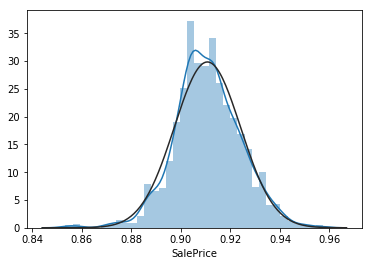

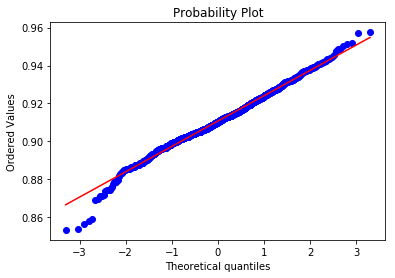

In [116]:
clear_data['SalePrice'] = np.log(clear_data['SalePrice'])
#transformed histogram and normal probability plot
sns.distplot(clear_data['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(clear_data['SalePrice'], plot=plt)


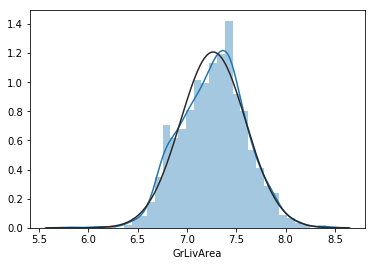

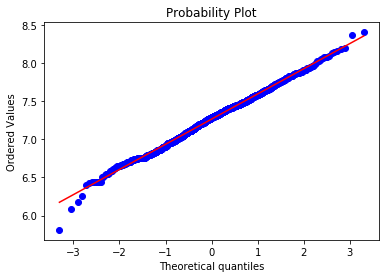

In [115]:
#data transformation
clear_data['GrLivArea'] = np.log(clear_data['GrLivArea'])
#transformed histogram and normal probability plot
sns.distplot(clear_data['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(clear_data['GrLivArea'], plot=plt)

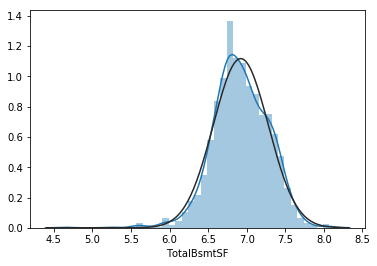

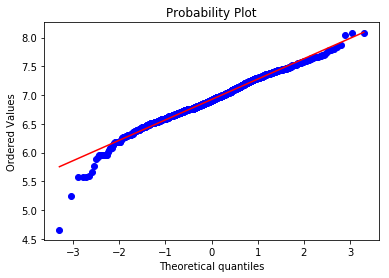

In [57]:
#create column for new variable (one is enough because it's a binary categorical feature)
train_data['HasBsmt'] = pd.Series(len(train_data['TotalBsmtSF']), index=train_data.index)
train_data['HasBsmt'] = 0 
train_data.loc[train_data['TotalBsmtSF']>0,'HasBsmt'] = 1

#transform data
train_data.loc[train_data['HasBsmt']==1,'TotalBsmtSF'] = np.log(train_data['TotalBsmtSF'])

#histogram and normal probability plot
sns.distplot(train_data[train_data['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_data[train_data['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

In [58]:
#convert categorical variable into dummy
train_data = pd.get_dummies(train_data)

In [69]:
# Selecting prediction target
y = train_data[["SalePrice"]]
features = [ 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea']

#Selecting the data relevant for prediction
X = train_data[features]
test_data.isnull().sum().max() #just checking that there's no missing data missing...


In [75]:
#Importing the Learning library
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

model = DecisionTreeRegressor(random_state=1)
model.fit(X, y)

predictions = model.predict(X);

# for i in range(0,len(predictions)):
#     print(predictions[i]," - ",y[i])
    

In [79]:
tes_file = "./train.csv"
test_data = pd.read_csv(file)
y.head()
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
